In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import random
import os
from currency_converter import CurrencyConverter

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [2]:
os.listdir()

['mostcommonsegments.png',
 'Screen Shot 2021-05-15 at 12.46.52 PM.png',
 '.DS_Store',
 'Screen Shot 2021-05-15 at 1.05.51 PM.png',
 'retentionrate.png',
 'segment_attributes.png',
 'Screen Shot 2021-05-15 at 2.47.39 PM.png',
 'rfmdistribution3.png',
 'segment_attributes2.png',
 'Screen Shot 2021-05-15 at 12.02.39 PM.png',
 'rfm_normaldistribution.png',
 'clustering plot.png',
 'Customer Segmentation Project KMeans.ipynb',
 'Screen Shot 2021-05-15 at 11.53.35 AM.png',
 'Screen Shot 2021-05-15 at 5.02.04 PM.png',
 'online_retail_II.xlsx',
 'attributesimportance.png',
 'CS_KMeans.ipynb',
 'Screen Shot 2021-05-15 at 2.28.53 PM.png',
 'kelbow_silhouette.png',
 'Screen Shot 2021-05-15 at 5.26.54 PM.png',
 'Screen Shot 2021-05-15 at 11.52.38 AM.png',
 'Screen Shot 2021-05-15 at 4.32.37 PM.png',
 'Screen Shot 2021-05-15 at 1.09.35 PM.png',
 '.ipynb_checkpoints',
 'clusteringplot.png',
 'rfm_logdistribution.png',
 'Screen Shot 2021-05-15 at 2.28.34 PM.png',
 'k_distortion.png',
 'wordcloud.png

In [3]:
df = pd.read_excel('online_retail_II.xlsx')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


## Cleaning and Prepping

In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
df.shape

(525461, 8)

In [8]:
df = df.dropna(subset = ['Customer ID'])

In [9]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [11]:
df.duplicated().sum()

6771

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Quantity,Price,Customer ID
count,410763.000000,410763.000000,410763.000000
mean,12.923735,3.908358,15353.621857
std,102.039550,71.714794,1681.657665
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13979.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16797.000000
max,19152.000000,25111.090000,18287.000000


In [13]:
df = df[df['Quantity']>0]

In [14]:
df.describe()

,Quantity,Price,Customer ID
count,400947.000000,400947.000000,400947.000000
mean,13.768523,3.305571,15361.454639
std,97.639816,35.046376,1680.669487
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13985.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16805.000000
max,19152.000000,10953.500000,18287.000000


In [15]:
df.shape

(400947, 8)

In [23]:
type(df['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [170]:
#Convert GBP to CAD at using realtime Currency Exchange Rate at InvoiceDate
c = CurrencyConverter()

def get_cad(x):
    for i, j in enumerate(df['Price']):
        return round(c.convert(x, 'GBP', 'CAD', date=df['InvoiceDate'][i]),2)
        
df['PriceCAD'] = df['Price'].apply(lambda x: get_cad(x)) 

In [171]:
df[['Price','PriceCAD']]

,Price,PriceCAD
0,6.95,12.04
1,6.75,11.69
2,6.75,11.69
3,2.10,3.64
4,1.25,2.17
...,...,...
525456,2.95,5.11
525457,3.75,6.50
525458,3.75,6.50
525459,3.75,6.50


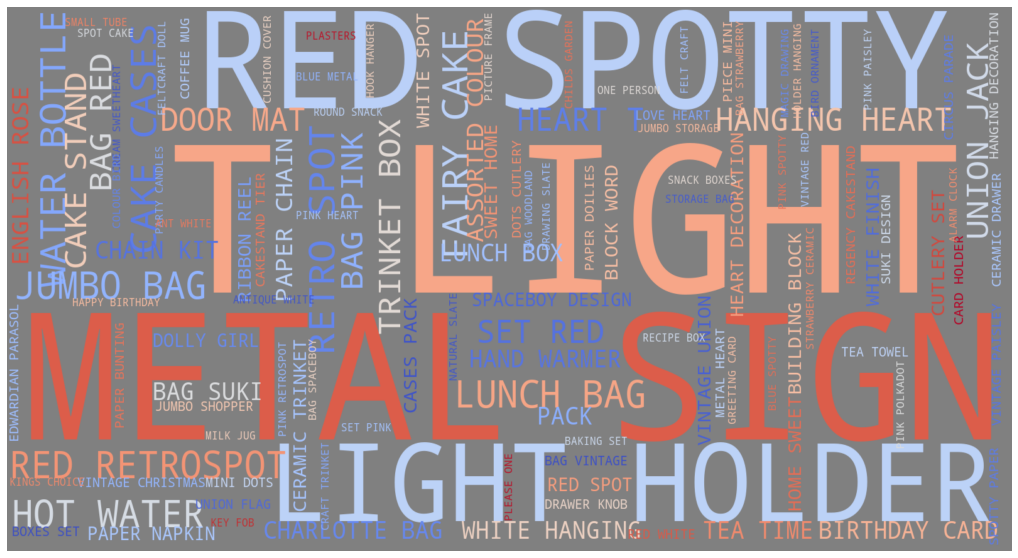

In [172]:
text = df['Description'].to_string()

wordcloud = WordCloud(prefer_horizontal=0.95, scale=4,
                      background_color="grey", relative_scaling=0.2, colormap="coolwarm").generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis('off')
plt.show()

## Analysis

In [173]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: dt.datetime(x.year,x.month,1))
grouping = df.groupby('Customer ID')['InvoiceMonth']

In [174]:
df['FirstPurchaseMonth'] = grouping.transform('min')
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,PriceCAD,InvoiceMonth,FirstPurchaseMonth,MonthSince
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.11,2010-12-01,2009-12-01,13
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,6.50,2010-12-01,2009-12-01,13
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,6.50,2010-12-01,2009-12-01,13
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,6.50,2010-12-01,2009-12-01,13
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,3.38,2010-12-01,2009-12-01,13


In [175]:
def get_month (dframe, column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    return year, month

invoice_year, invoice_month = get_month(df, 'InvoiceMonth')
cohort_year, cohort_month = get_month(df, 'FirstPurchaseMonth')

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

df['MonthSince'] = year_diff * 12 + month_diff + 1

In [176]:
#Number of Customers from each cohort
grouping = df.groupby(['FirstPurchaseMonth', 'MonthSince'])
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique)

In [177]:
#Unique elements
cohort_data = cohort_data.reset_index()
cohort_data

,FirstPurchaseMonth,MonthSince,Customer ID
0,2009-12-01,1,955
1,2009-12-01,2,337
2,2009-12-01,3,319
3,2009-12-01,4,406
4,2009-12-01,5,363
...,...,...,...
86,2010-10-01,2,97
87,2010-10-01,3,35
88,2010-11-01,1,325
89,2010-11-01,2,35


In [178]:
cohort_table = cohort_data.pivot(index='FirstPurchaseMonth', columns='MonthSince', values='Customer ID')
cohort_table

MonthSince,1,2,3,4,5,6,7,8,9,10,11,12,13
FirstPurchaseMonth,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02-01,376.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
#Show as a percentage to get retention rate
cohort_denom = cohort_table.iloc[:,0]     #retain FirstPurchaseMonth column
retention = cohort_table.divide(cohort_denom, axis=0)   #divide along row
retention.round(2) * 100

MonthSince,1,2,3,4,5,6,7,8,9,10,11,12,13
FirstPurchaseMonth,,,,,,,,,,,,,
2009-12-01,100.0,35.0,33.0,43.0,38.0,36.0,38.0,34.0,34.0,36.0,42.0,50.0,25.0
2010-01-01,100.0,21.0,31.0,31.0,26.0,30.0,26.0,23.0,28.0,32.0,30.0,10.0,NaN
2010-02-01,100.0,24.0,22.0,29.0,24.0,20.0,19.0,28.0,25.0,27.0,7.0,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.0,23.0,20.0,25.0,30.0,28.0,8.0,NaN,NaN,NaN
2010-04-01,100.0,19.0,19.0,16.0,18.0,22.0,28.0,26.0,7.0,NaN,NaN,NaN,NaN
2010-05-01,100.0,16.0,17.0,17.0,18.0,26.0,21.0,8.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.0,19.0,20.0,23.0,29.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,16.0,18.0,30.0,29.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.0,30.0,32.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


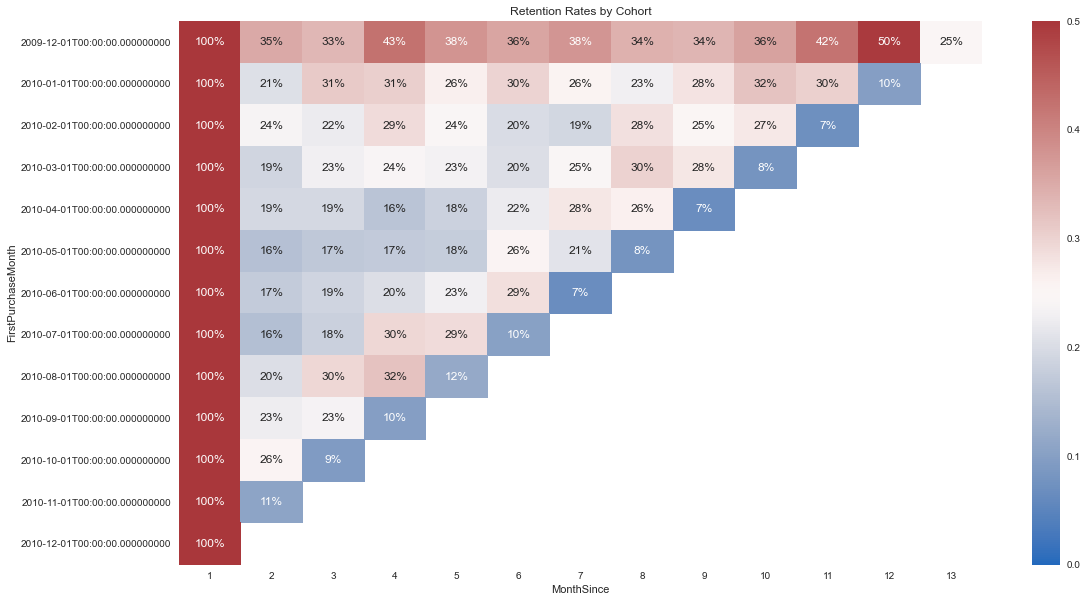

In [180]:
#Visualize with heatmap
plt.figure(figsize=(18,10))
plt.title('Retention Rates by Cohort')
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.0, vmax = 0.5, cmap = 'vlag')
plt.show()

In [181]:
#customer lifetime value
#average order total * average number of purchases in a year * average retention time in years
#customer_value = This provides the average lifetime value of a customer based on existing data.

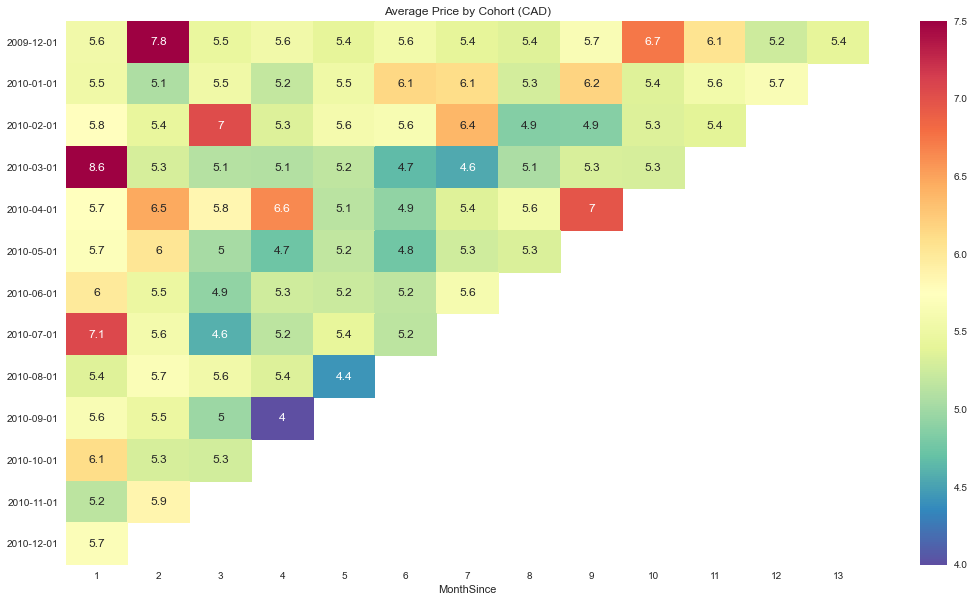

In [182]:
#Average Price for each cohort
grouping = df.groupby(['FirstPurchaseMonth', 'MonthSince'])
cohort_data = grouping['PriceCAD'].mean()
cohort_data = cohort_data.reset_index()
average_price = cohort_data.pivot(index='FirstPurchaseMonth', columns='MonthSince', values='PriceCAD')
average_price.index = average_price.index.date

plt.figure(figsize = (18,10))
plt.title('Average Price by Cohort (CAD)')
sns.heatmap(data=average_price, annot = True, vmin = 4.0, vmax = 7.5, cmap = "Spectral_r")
plt.show()

## Recency, Frequency, Monetary Value

In [183]:
df['TotalSum'] = (df['PriceCAD'] * df['Quantity']).round(2)

print('Min Invoice Date:', df.InvoiceDate.dt.date.min(),
     '\nMax Invoice Date:', df.InvoiceDate.dt.date.max())

Min Invoice Date: 2009-12-01 
Max Invoice Date: 2010-12-09


In [184]:
current_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
current_date

Timestamp('2010-12-10 20:01:00')

In [185]:
#R = days since last purchase
#F = count of invoices
#M = sum of price
#Group by Customer ID

rfm = df.groupby(['Customer ID']).agg({'InvoiceDate': lambda x: (current_date - x.max()).days,
                                     'Invoice':'count','TotalSum':'sum'})
rfm

,InvoiceDate,Invoice,TotalSum
Customer ID,,,
12346.0,165,33,646.03
12347.0,3,71,2293.52
12348.0,74,20,383.93
12349.0,43,102,4628.49
12351.0,11,21,521.73
...,...,...,...
18283.0,18,217,1073.20
18284.0,67,28,800.08
18285.0,296,12,739.93


In [186]:
#InvoiceDate = Recency
#Invoice = Frequency
#TotalSum = Monetary Value

rfm.rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','TotalSum':'MonetaryValue'},inplace=True)
rfm

,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,165,33,646.03
12347.0,3,71,2293.52
12348.0,74,20,383.93
12349.0,43,102,4628.49
12351.0,11,21,521.73
...,...,...,...
18283.0,18,217,1073.20
18284.0,67,28,800.08
18285.0,296,12,739.93


In [187]:
clv['Avg_Purchase_Value'] = rfm['MonetaryValue'].div(clv['Frequency'], axis=0)
clv.rename(columns={'MonetaryValue': 'Customer_Value', 'Frequency':'Avg_Purchase_Frequency_Rate'})

NameError: name 'clv' is not defined

In [188]:
r_labels=range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,9)

r_quartiles = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'], q=8, labels=m_labels)

rfm=rfm.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)
rfm

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
12346.0,165,33,646.03,1,2,3
12347.0,3,71,2293.52,4,3,6
12348.0,74,20,383.93,2,2,2
12349.0,43,102,4628.49,3,4,7
12351.0,11,21,521.73,4,2,2
...,...,...,...,...,...,...
18283.0,18,217,1073.20,4,4,4
18284.0,67,28,800.08,2,2,4
18285.0,296,12,739.93,1,1,3


In [190]:
def add_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm, axis=1)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12346.0,165,33,646.03,1,2,3,123,6
12347.0,3,71,2293.52,4,3,6,436,13
12348.0,74,20,383.93,2,2,2,222,6
12349.0,43,102,4628.49,3,4,7,347,14
12351.0,11,21,521.73,4,2,2,422,8
...,...,...,...,...,...,...,...,...
18283.0,18,217,1073.20,4,4,4,444,12
18284.0,67,28,800.08,2,2,4,224,8
18285.0,296,12,739.93,1,1,3,113,5


In [191]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)

RFM_Segment
448    263
111    243
447    146
112    143
347    116
      ... 
117      2
143      2
231      2
418      1
242      1
Length: 119, dtype: int64

In [192]:
rfm[rfm['RFM_Segment']=='448'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12415.0,11,212,33863.70,4,4,8,448,16
12431.0,9,170,7571.61,4,4,8,448,16
12433.0,2,286,12486.73,4,4,8,448,16
12471.0,10,677,34871.20,4,4,8,448,16
12472.0,5,572,19598.75,4,4,8,448,16


In [193]:
rfm[rfm['RFM_Segment']=='111'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12362.0,374,1,225.19,1,1,1,111,3
12404.0,318,1,109.55,1,1,1,111,3
12466.0,318,1,98.27,1,1,1,111,3
12496.0,256,10,78.61,1,1,1,111,3
12555.0,318,1,223.86,1,1,1,111,3


In [194]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12346.0,165,33,646.03,1,2,3,123,6
12347.0,3,71,2293.52,4,3,6,436,13
12348.0,74,20,383.93,2,2,2,222,6
12349.0,43,102,4628.49,3,4,7,347,14
12351.0,11,21,521.73,4,2,2,422,8
...,...,...,...,...,...,...,...,...
18283.0,18,217,1073.20,4,4,4,444,12
18284.0,67,28,800.08,2,2,4,224,8
18285.0,296,12,739.93,1,1,3,113,5


In [195]:
#14 Scores: 3-16
#128 Unique Segments
#Most Common RFM_Segment

mc_rfm = rfm.groupby(['RFM_Segment']).agg({'RFM_Segment':'count'}).rename(columns={'RFM_Segment':'Segment_Count'})
mc_rfm = mc_rfm.sort_values('Segment_Count', ascending=False)[:8]
mc_rfm = mc_rfm.reset_index()
mc_rfm

,RFM_Segment,Segment_Count
0,448,263
1,111,243
2,447,146
3,112,143
4,347,116
5,348,111
6,211,96
7,123,92


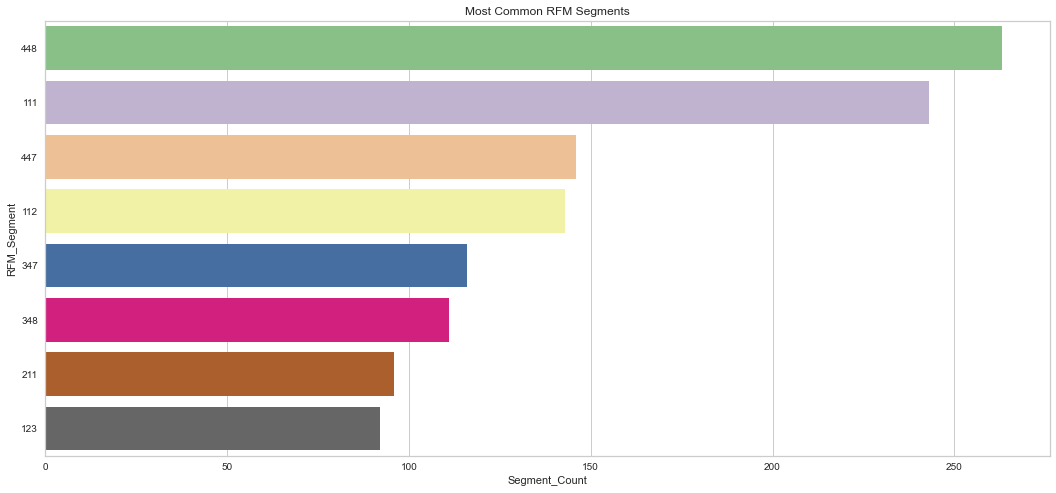

In [196]:
plt.figure(figsize = (18,8))
plt.title('Most Common RFM Segments')
sns.barplot(x=mc_rfm['Segment_Count'],y=mc_rfm['RFM_Segment'],palette='Accent')
plt.show()

In [197]:
rfm.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           252.0       6.0         181.0   243
4           196.0      13.0         309.0   291
5           160.0      16.0         409.0   308
6           134.0      21.0         516.0   322
7           112.0      27.0         707.0   336
8            87.0      33.0         887.0   333
9            78.0      40.0        1177.0   324
10           79.0      56.0        1827.0   343
11           59.0      71.0        2189.0   342
12           49.0      91.0        2973.0   300
13           40.0     123.0        3783.0   317
14           31.0     173.0        5461.0   305
15           17.0     230.0        8137.0   287
16            8.0     466.0       24474.0   263

In [364]:
#Segment by Score

def segmenting(df):
    if df['RFM_Score'] >= 13:
        return 'Gold'
    elif (df['RFM_Score'] >= 10) and (df['RFM_Score'] < 13):
        return 'Silver'
    elif (df['RFM_Score'] >= 7) and (df['RFM_Score'] < 10):
        return 'Bronze'
    else:
        return 'Copper'
    
rfm['Score_Segments'] = rfm.apply(segmenting, axis=1)

seg = rfm.groupby('Score_Segments').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(0)
seg = seg.reset_index()

# sort
seg['Score_Segments'] = pd.Categorical(seg['Score_Segments'], ["Gold", "Silver", "Bronze", "Copper"])
seg.sort_values('Score_Segments')

Score_Segments Recency Frequency MonetaryValue      
                    mean      mean          mean count
2           Gold    25.0     239.0        9929.0  1172
3         Silver    63.0      72.0        2302.0   985
0         Bronze    93.0      33.0         921.0   993
1         Copper   181.0      15.0         367.0  1162

## Implement Unsupervise KMeans Clustering

In [363]:
#Check KMeans assumptions
# standardize the variables to have equal variance is important - they get wieghted equally with respect to each other
# k-means assumes the variance of the distribution of each attribute (variable) is spherical;
# all variables have the same variance;
# the prior probability for all k clusters is the same, i.e., each cluster has roughly equal number of observations;

#all clusters have the same SSE
#all variables have the same importance for every cluster

rfm = rfm[rfm['MonetaryValue']>0]
rfm_rfm = rfm[['Recency','Frequency','MonetaryValue']]
rfm_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4312.000000,4312.000000,4312.000000
mean,91.171846,92.983534,3535.527718
std,96.860633,198.919846,15440.388988
min,1.000000,1.000000,5.110000
25%,18.000000,18.000000,532.215000
50%,53.000000,43.000000,1216.045000
75%,136.000000,100.250000,2971.100000
max,374.000000,5568.000000,604793.320000


/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

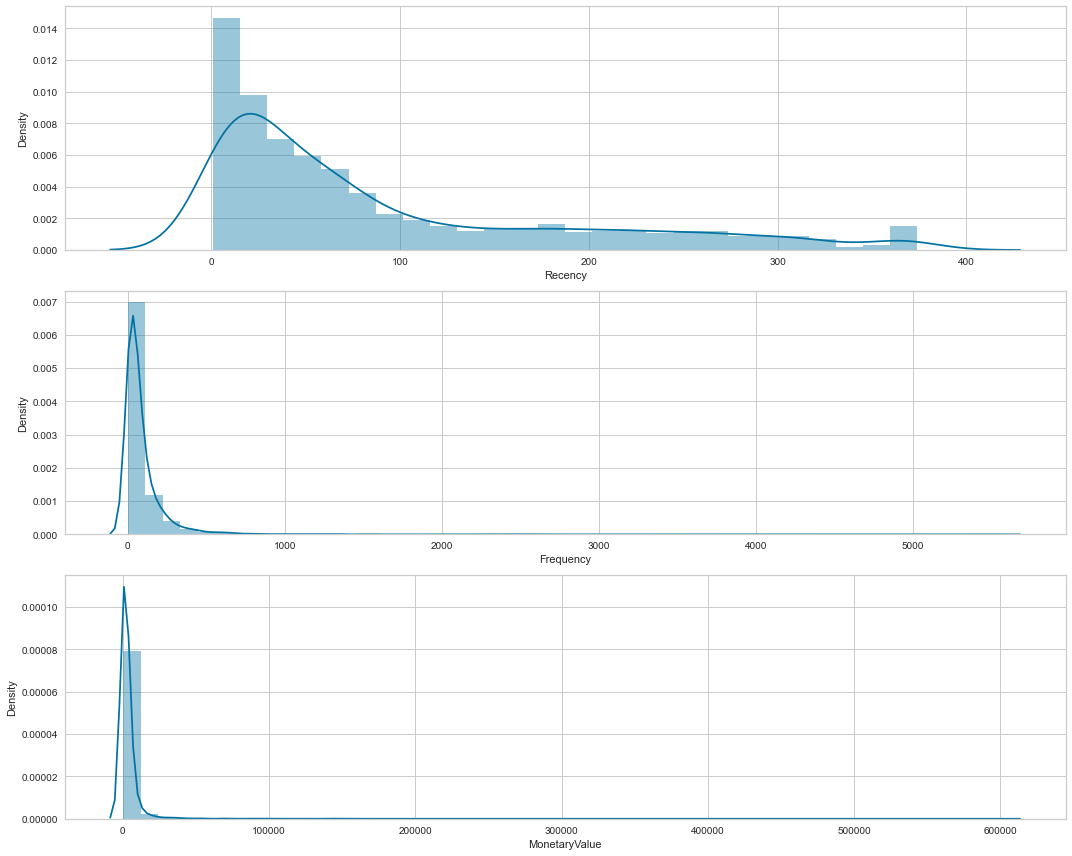

In [200]:
f, ax = plt.subplots(figsize=(15,12))
plt.subplot(3,1,1);sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3,1,2);sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3,1,3);sns.distplot(rfm.MonetaryValue, label = 'Monetary Value')
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

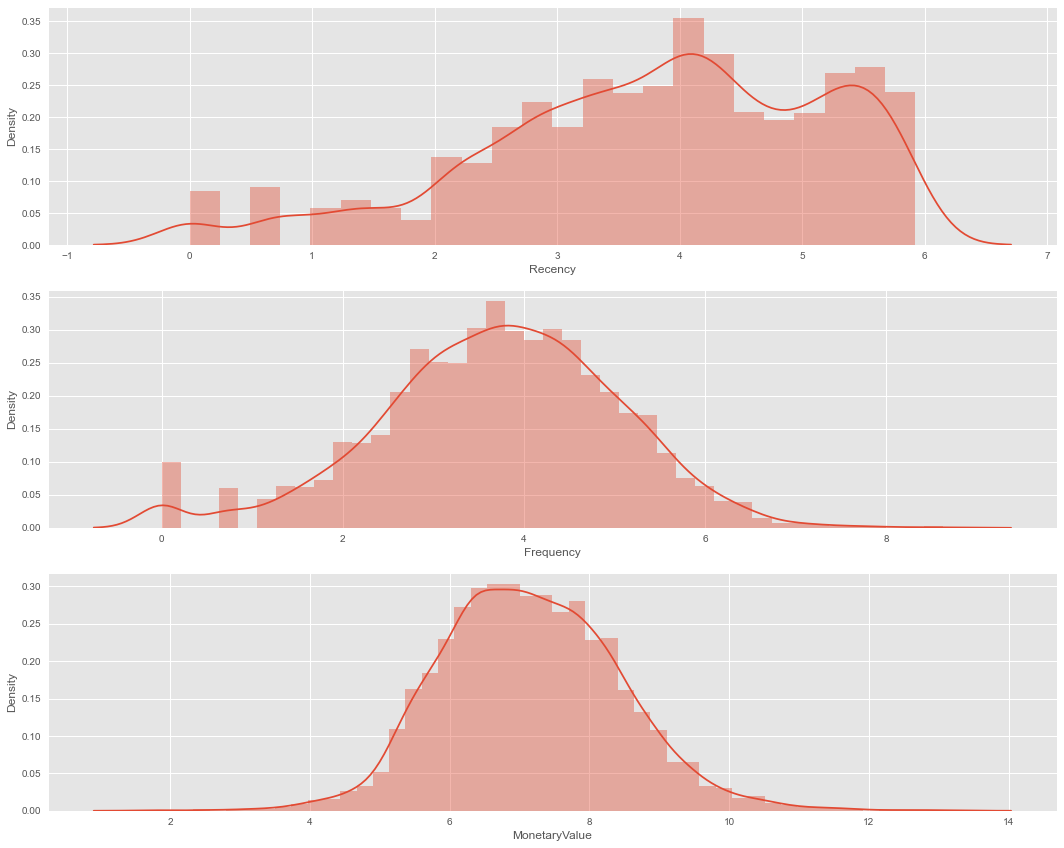

In [202]:
#Recency is skewed to the right (mode, median, mean)
#STEP 1: Logarithmic transformation (only works with positive data, so has to go first)
rfm_log = np.log(rfm_rfm)

f, ax = plt.subplots(figsize=(15,12))
plt.subplot(3,1,1);sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3,1,2);sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3,1,3);sns.distplot(rfm_log.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

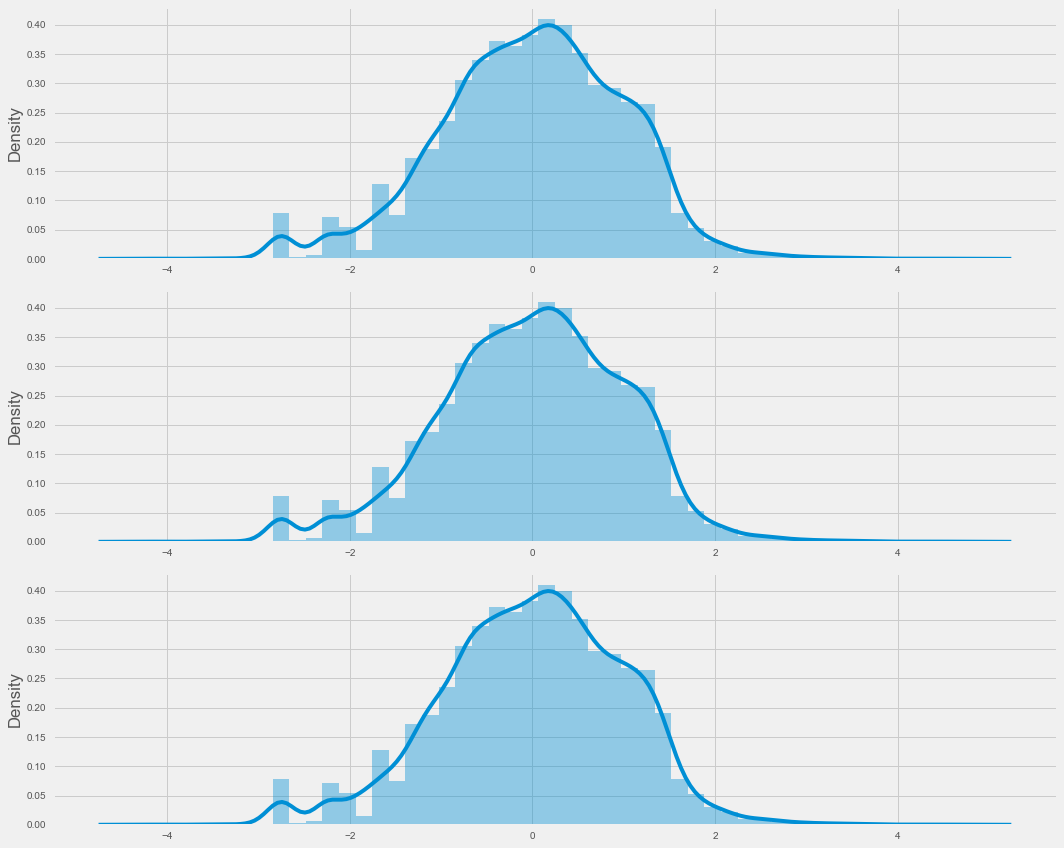

In [366]:
#STEP 2: Standardize to the same average value (mean)
#STEP 3: Scale to the same standard deviation

#Normalize the variables with StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
rfm_normal = scaler.transform(rfm_log)

rfm_normal

f, ax = plt.subplots(figsize=(15,12))
plt.subplot(3,1,1);sns.distplot(rfm_normal, label = 'Recency')
plt.subplot(3,1,2);sns.distplot(rfm_normal, label = 'Frequency')
plt.subplot(3,1,3);sns.distplot(rfm_normal, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

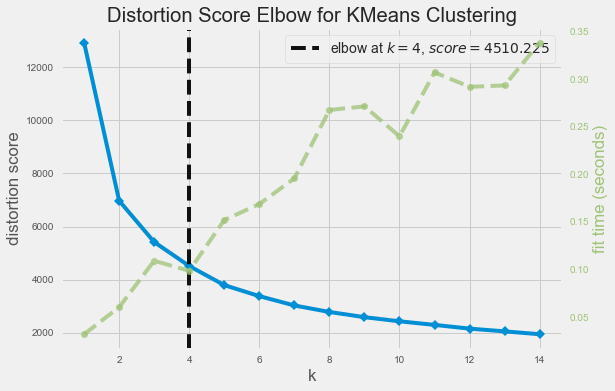

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [367]:
# Finding best k value - Distortion
# Distortion: sum of squared distances from each point to its assigned center

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(rfm_normal)        
visualizer.show()                

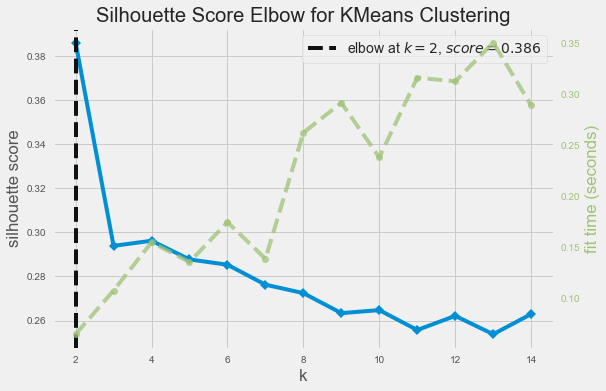

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [368]:
#silhouette: how similar an object is to its own cluster (cohesion) compared to other clusters (separation)
#euclidean distance
#silhouette coefficient -1 to 1

model = KMeans()
visualizer = KElbowVisualizer(model, metric='silhouette', k=(2,15)) 

visualizer.fit(rfm_normal)        
visualizer.show()    

In [369]:
rfm_normal

array([[ 0.94254517, -0.16009801, -0.53297541],
       [-1.94093439,  0.41321854,  0.4530728 ],
       [ 0.36555155, -0.5348215 , -0.93796875],
       ...,
       [ 1.36306068, -0.91706552, -0.42735855],
       [ 0.66375768,  0.36982745,  0.43676467],
       [-0.65167254,  0.54788873,  0.89846984]])

In [370]:
kc = KMeans(n_clusters = 4, random_state = 1)
kc.fit(rfm_normal)

cluster_labels = kc.labels_

rfm_rfm_k4 = rfm_rfm.assign(K_Cluster = cluster_labels)

rfm_rfm_k4.groupby('K_Cluster').agg({'Recency':'mean', 'Frequency':'mean',
                                    'MonetaryValue': ['mean','count']}).round(0)

rfm_rfm_k4.reset_index(inplace=True)

In [371]:
rfm_rfm_k4

,Customer ID,Recency,Frequency,MonetaryValue,K_Cluster
0,12346.0,165,33,646.03,3
1,12347.0,3,71,2293.52,0
2,12348.0,74,20,383.93,3
3,12349.0,43,102,4628.49,2
4,12351.0,11,21,521.73,1
...,...,...,...,...,...
4307,18283.0,18,217,1073.20,0
4308,18284.0,67,28,800.08,1
4309,18285.0,296,12,739.93,3
4310,18286.0,112,67,2245.96,2


In [345]:
rfm_normal = pd.DataFrame(rfm_normal, index=rfm_rfm.index, columns=rfm_rfm.columns)
rfm_normal

In [352]:
rfm_normal_k4 = rfm_normal.assign(K_Cluster = cluster_labels)
rfm_normal_k4
rfm_normal_k4.reset_index(inplace=True)
rfm_normal_k4

,Customer ID,Recency,Frequency,MonetaryValue,Score_Segments,K_Cluster
0,12346.0,0.942545,-0.160098,-0.532975,Copper,3
1,12347.0,-1.940934,0.413219,0.453073,Gold,0
2,12348.0,0.365552,-0.534822,-0.937969,Copper,3
3,12349.0,-0.025067,0.684318,0.999520,Gold,2
4,12351.0,-1.006034,-0.498312,-0.699285,Bronze,1
...,...,...,...,...,...,...
4307,18283.0,-0.651673,1.249218,-0.137968,Silver,0
4308,18284.0,0.294048,-0.283044,-0.366533,Bronze,1
4309,18285.0,1.363061,-0.917066,-0.427359,Copper,3
4310,18286.0,0.663758,0.369827,0.436765,Silver,2


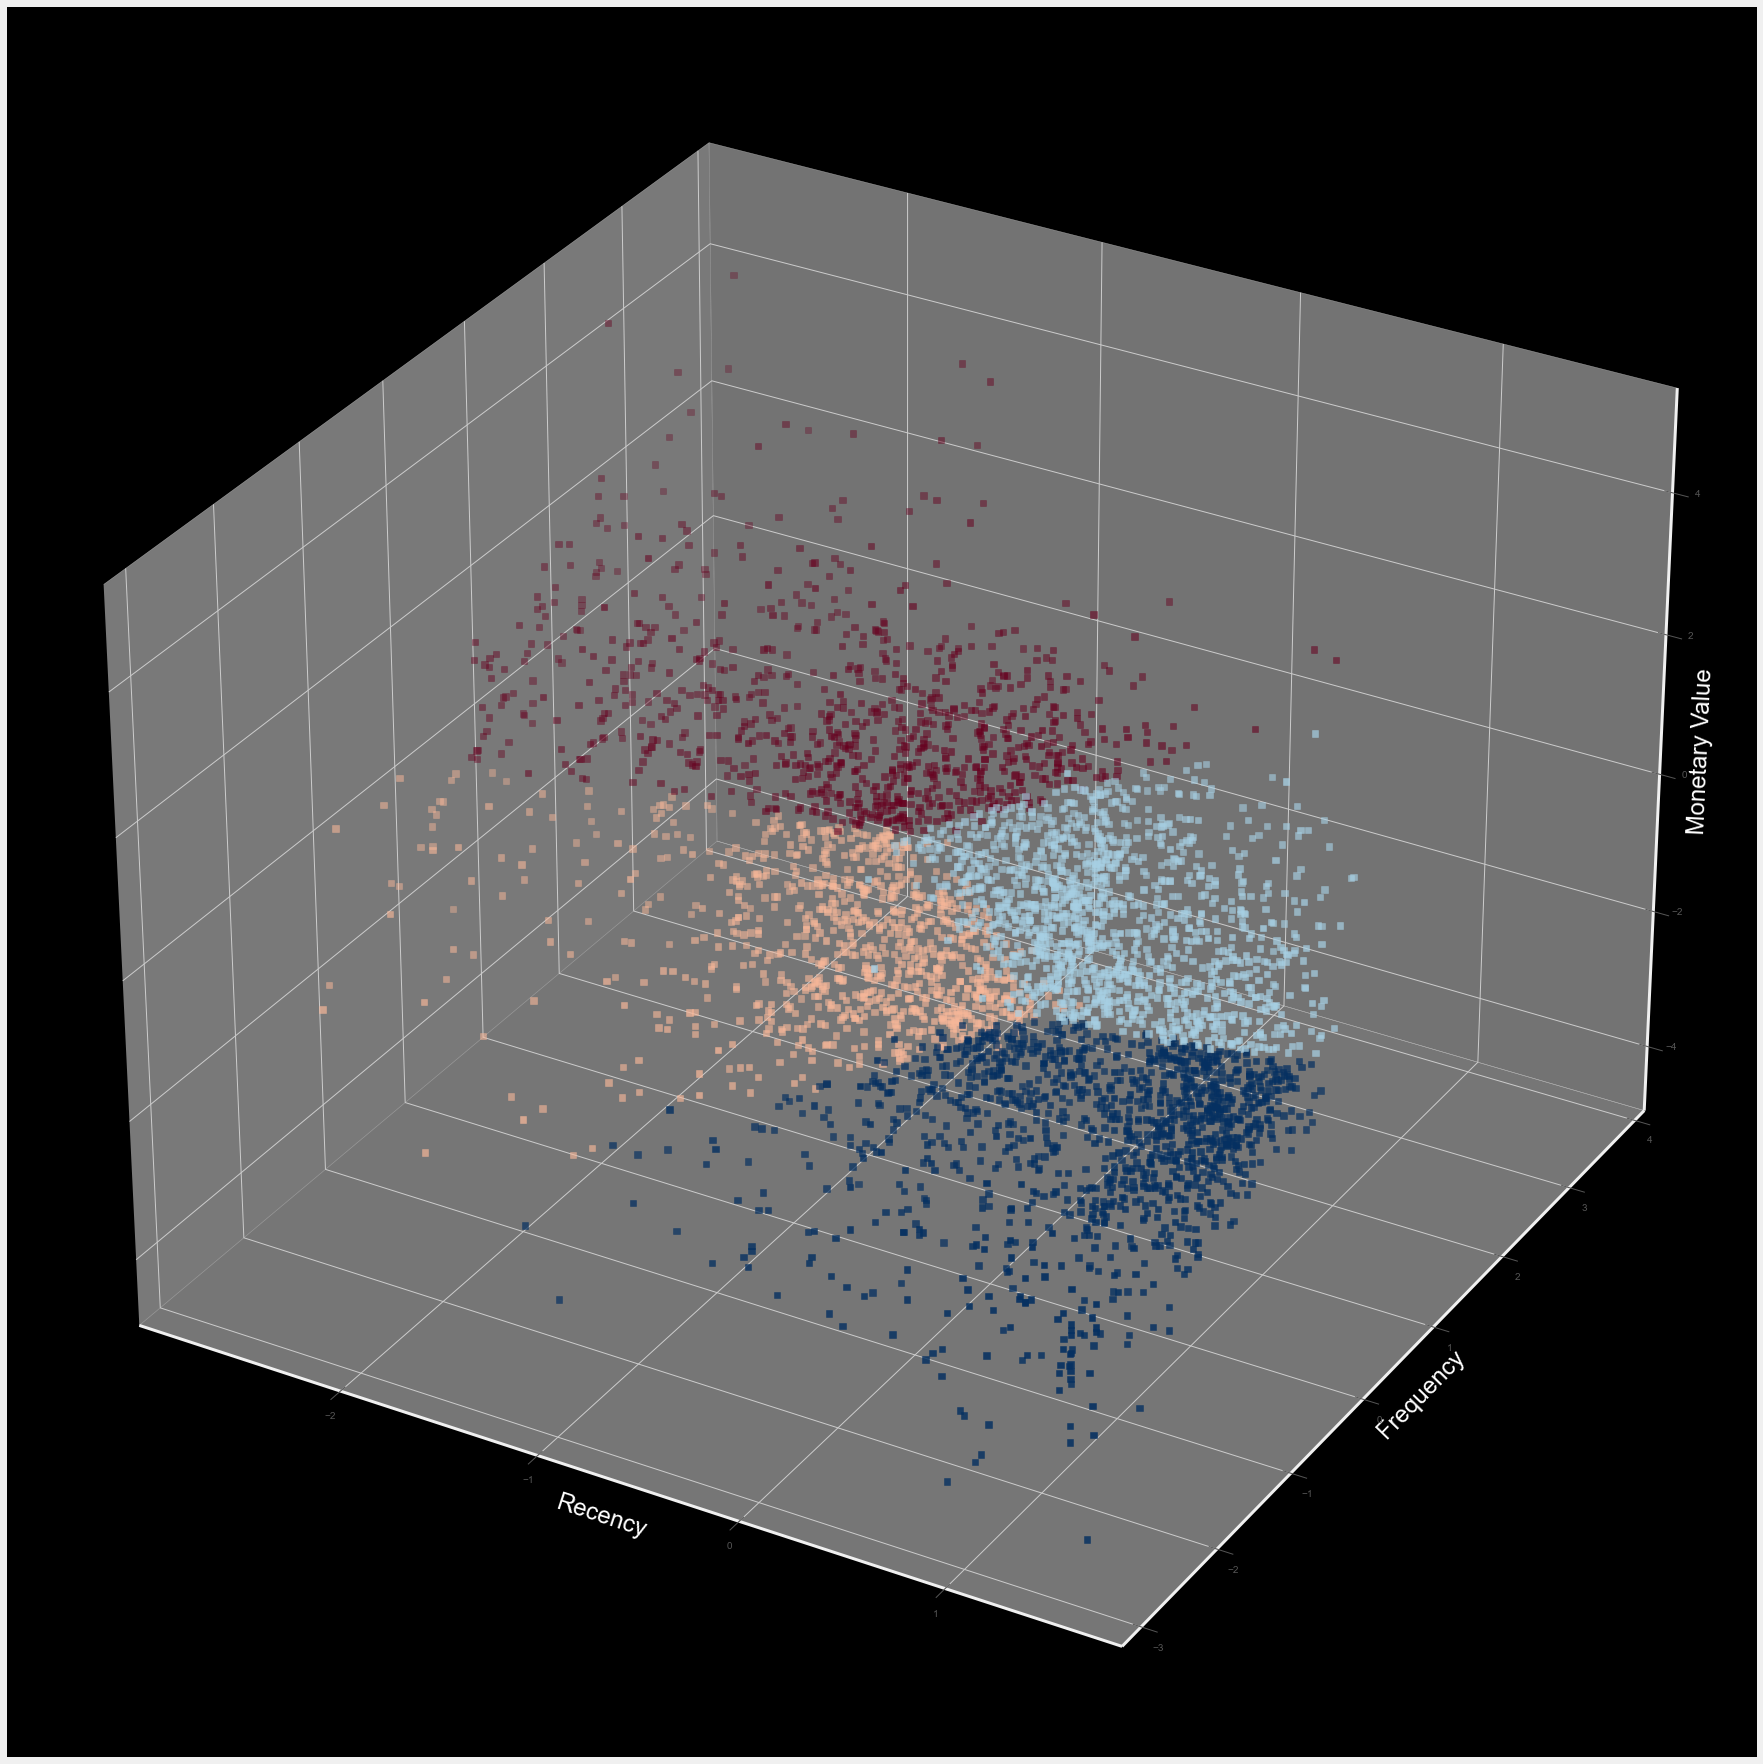

In [348]:
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111, projection='3d')
x = np.array(rfm_normal_k4['Recency'])
y = np.array(rfm_normal_k4['Frequency'])
z = np.array(rfm_normal_k4['MonetaryValue'])

ax.scatter(x,y,z, marker="s", c=rfm_normal_k4['K_Cluster'], s=40, cmap="RdBu")
ax.set_xlabel("Recency", c='w', fontsize=24)
ax.set_ylabel("Frequency", c='w', fontsize=24)
ax.set_zlabel("Monetary Value", c='w', fontsize=24)
                         
#fig.set_facecolor('black')
ax.set_facecolor('black')
plt.show()

In [354]:
rfm_normal_k4

,Customer ID,Recency,Frequency,MonetaryValue,Score_Segments,K_Cluster
0,12346.0,0.942545,-0.160098,-0.532975,Copper,3
1,12347.0,-1.940934,0.413219,0.453073,Gold,0
2,12348.0,0.365552,-0.534822,-0.937969,Copper,3
3,12349.0,-0.025067,0.684318,0.999520,Gold,2
4,12351.0,-1.006034,-0.498312,-0.699285,Bronze,1
...,...,...,...,...,...,...
4307,18283.0,-0.651673,1.249218,-0.137968,Silver,0
4308,18284.0,0.294048,-0.283044,-0.366533,Bronze,1
4309,18285.0,1.363061,-0.917066,-0.427359,Copper,3
4310,18286.0,0.663758,0.369827,0.436765,Silver,2


In [358]:
rfm_normal_k4['K_Cluster'] = rfm_normal_k4['K_Cluster'].replace({0:'Gold', 
                                                           1:'Silver', 
                                                           2:'Bronze', 
                                                           3:'Copper'})
rfm_normal_k4

,Customer ID,Recency,Frequency,MonetaryValue,Score_Segments,K_Cluster
0,12346.0,0.942545,-0.160098,-0.532975,Copper,Copper
1,12347.0,-1.940934,0.413219,0.453073,Gold,Gold
2,12348.0,0.365552,-0.534822,-0.937969,Copper,Copper
3,12349.0,-0.025067,0.684318,0.999520,Gold,Bronze
4,12351.0,-1.006034,-0.498312,-0.699285,Bronze,Silver
...,...,...,...,...,...,...
4307,18283.0,-0.651673,1.249218,-0.137968,Silver,Gold
4308,18284.0,0.294048,-0.283044,-0.366533,Bronze,Silver
4309,18285.0,1.363061,-0.917066,-0.427359,Copper,Copper
4310,18286.0,0.663758,0.369827,0.436765,Silver,Bronze


In [375]:
rfm_normal_k4['Prediction'] = np.where(rfm_normal_k4["K_Cluster"] == rfm_normal_k4["Score_Segments"], True, False)
rfm_normal_k4

,Customer ID,Recency,Frequency,MonetaryValue,Score_Segments,K_Cluster,Prediction
0,12346.0,0.942545,-0.160098,-0.532975,Copper,Copper,True
1,12347.0,-1.940934,0.413219,0.453073,Gold,Gold,True
2,12348.0,0.365552,-0.534822,-0.937969,Copper,Copper,True
3,12349.0,-0.025067,0.684318,0.999520,Gold,Bronze,False
4,12351.0,-1.006034,-0.498312,-0.699285,Bronze,Silver,False
...,...,...,...,...,...,...,...
4307,18283.0,-0.651673,1.249218,-0.137968,Silver,Gold,False
4308,18284.0,0.294048,-0.283044,-0.366533,Bronze,Silver,False
4309,18285.0,1.363061,-0.917066,-0.427359,Copper,Copper,True
4310,18286.0,0.663758,0.369827,0.436765,Silver,Bronze,False


In [376]:
rfm_normal_k4['Prediction'].value_counts(True)

True     0.626855
False    0.373145
Name: Prediction, dtype: float64

In [378]:
rfm_melt = pd.melt(rfm_normal_k4, id_vars=['Customer ID', 'Score_Segments', 'K_Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Metric', value_name='Value')
rfm_melt

,Customer ID,Score_Segments,K_Cluster,Metric,Value
0,12346.0,Copper,Copper,Recency,0.942545
1,12347.0,Gold,Gold,Recency,-1.940934
2,12348.0,Copper,Copper,Recency,0.365552
3,12349.0,Gold,Bronze,Recency,-0.025067
4,12351.0,Bronze,Silver,Recency,-1.006034
...,...,...,...,...,...
12931,18283.0,Silver,Gold,MonetaryValue,-0.137968
12932,18284.0,Bronze,Silver,MonetaryValue,-0.366533
12933,18285.0,Copper,Copper,MonetaryValue,-0.427359
12934,18286.0,Silver,Bronze,MonetaryValue,0.436765


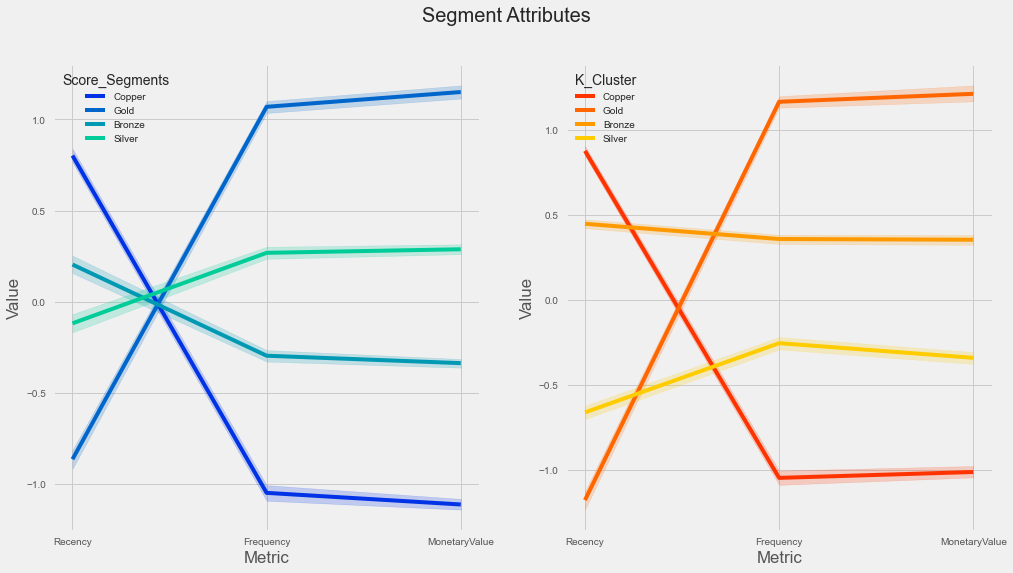

In [379]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
sns.lineplot(x = 'Metric', y='Value', hue='Score_Segments', data = rfm_melt, ax=ax1, palette="winter")
sns.lineplot(x = 'Metric', y='Value', hue='K_Cluster', data = rfm_melt, ax=ax2, palette="autumn")

plt.suptitle("Segment Attributes", fontsize=20)
plt.show()

In [380]:
rfm_rfm

,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,165,33,646.03
12347.0,3,71,2293.52
12348.0,74,20,383.93
12349.0,43,102,4628.49
12351.0,11,21,521.73
...,...,...,...
18283.0,18,217,1073.20
18284.0,67,28,800.08
18285.0,296,12,739.93


In [387]:
#0 no importance
#high positives and high negatives impact Cluster decision
population_avg = rfm_rfm.mean()
cluster_avg = rfm_rfm_k4.groupby(['K_Cluster']).mean()
prop_rfm = (cluster_avg / population_avg - 1).drop('Customer ID', axis=1)
prop_rfm = prop_rfm[['Recency','Frequency','MonetaryValue']]
prop_rfm = prop_rfm.round(2).sort_values('Recency')
prop_rfm

,Recency,Frequency,MonetaryValue
K_Cluster,,,
Gold,-0.85,1.94,2.26
Silver,-0.74,-0.60,-0.71
Bronze,0.13,-0.13,-0.24
Copper,1.04,-0.84,-0.87


In [388]:
#the difference between this and mean
pop_avg = rfm.iloc[:, 0:3].mean()
clust_avg = rfm.groupby('Score_Segments').mean().iloc[:,0:3]
impt_rfm = clust_avg / pop_avg - 1
impt_rfm = impt_rfm.round(2).sort_values('Recency')
impt_rfm

,Recency,Frequency,MonetaryValue
Score_Segments,,,
Gold,-0.73,1.57,1.81
Silver,-0.31,-0.23,-0.35
Bronze,0.02,-0.64,-0.74
Copper,0.98,-0.84,-0.90


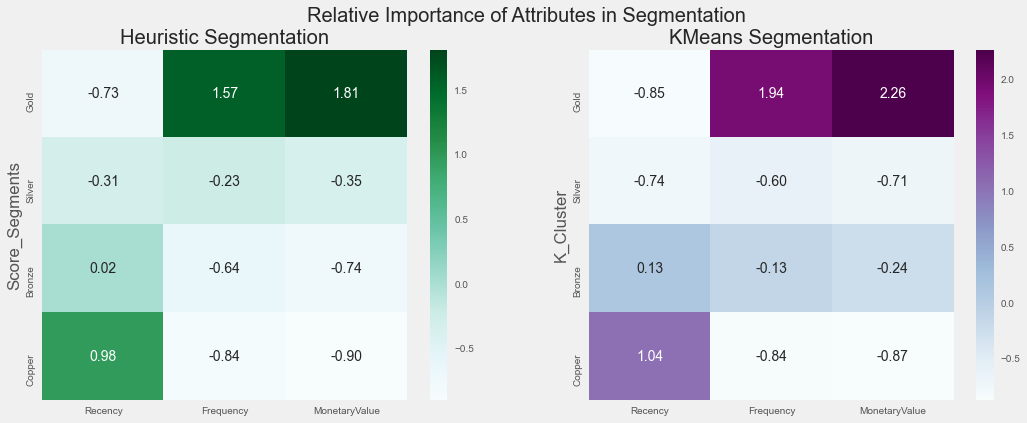

In [389]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(data=impt_rfm, annot=True, fmt='.2f', cmap='BuGn', ax=ax1)
ax1.set(title= 'Heuristic Segmentation')

sns.heatmap(data=prop_rfm, annot=True, fmt='.2f', cmap='BuPu', ax=ax2)
ax2.set(title= 'KMeans Segmentation')

plt.suptitle('Relative Importance of Attributes in Segmentation', fontsize=20)

plt.show()

In [404]:
rfm_rfm_k4

rfm_rfm_k4_g = rfm_rfm_k4.groupby('K_Cluster').agg({'Recency':'mean', 'Frequency':'mean',
                                                        'MonetaryValue': ['mean','count']}).round(0)

rfm_rfm_k4_g.reset_index(inplace=True)
rfm_rfm_k4_g

K_Cluster Recency Frequency MonetaryValue      
               mean      mean          mean count
0    Bronze   103.0      81.0        2689.0  1286
1    Copper   186.0      15.0         469.0  1221
2      Gold    14.0     274.0       11511.0   893
3    Silver    23.0      38.0        1026.0   912

In [403]:
#formatting
rfm_rfm_k4_g['K_Cluster'] = pd.Categorical(rfm_rfm_k4_g['K_Cluster'], ["Gold", "Silver", "Bronze", "Copper"])
rfm_rfm_k4_g.sort_values('K_Cluster')

K_Cluster Recency Frequency MonetaryValue      
               mean      mean          mean count
2      Gold    14.0     274.0       11511.0   893
3    Silver    23.0      38.0        1026.0   912
0    Bronze   103.0      81.0        2689.0  1286
1    Copper   186.0      15.0         469.0  1221

## END OF NOTEBOOK